In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Enhanced_Salary_Data.csv")

In [4]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,City,Seniority Level,Industry,Remote Status
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Hyderabad,Junior,IT,Remote
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Mumbai,Junior,Analytics,Onsite
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Delhi,Senior,Management,Remote
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Mumbai,Junior,Sales,Hybrid
4,52.0,Male,Master's,Director,20.0,200000.0,Bangalore,Senior,Management,Remote
...,...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,Hyderabad,Senior,Management,Remote
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Mumbai,Junior,Sales,Remote
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,Pune,Mid,Management,Remote
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,Bangalore,Mid,Management,Onsite


In [5]:
print("Shape:", df.shape)

Shape: (6704, 10)


In [6]:
print("\n Columns:\n", df.columns.tolist())


 Columns:
 ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary', 'City', 'Seniority Level', 'Industry', 'Remote Status']


In [7]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,City,Seniority Level,Industry,Remote Status
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Hyderabad,Junior,IT,Remote
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Mumbai,Junior,Analytics,Onsite
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Delhi,Senior,Management,Remote
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Mumbai,Junior,Sales,Hybrid
4,52.0,Male,Master's,Director,20.0,200000.0,Bangalore,Senior,Management,Remote


In [8]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,City,Seniority Level,Industry,Remote Status
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,Hyderabad,Senior,Management,Remote
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Mumbai,Junior,Sales,Remote
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,Pune,Mid,Management,Remote
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,Bangalore,Mid,Management,Onsite
6703,26.0,Female,High School,Sales Executive,1.0,35000.0,Delhi,Junior,Sales,Hybrid


In [9]:
print("\n Data Types:\n", df.dtypes)


 Data Types:
 Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
City                    object
Seniority Level         object
Industry                object
Remote Status           object
dtype: object


In [10]:
print("\n Numeric Summary:\n", df.describe())


 Numeric Summary:
                Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


In [11]:
print("\n Missing Values:\n", df.isnull().sum())


 Missing Values:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
City                   0
Seniority Level        0
Industry               0
Remote Status          0
dtype: int64


In [12]:
df = df.dropna()

In [13]:
print("\n Missing Values:\n", df.isnull().sum())


 Missing Values:
 Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
City                   0
Seniority Level        0
Industry               0
Remote Status          0
dtype: int64


In [14]:
print("\n Duplicate Rows:", df.duplicated().sum())


 Duplicate Rows: 1684


In [15]:
df = df.drop_duplicates()

In [16]:
print("\n Duplicate Rows:", df.duplicated().sum())


 Duplicate Rows: 0


In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
print(" Final Shape:", df.shape)

 Final Shape: (5014, 10)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Step 1: Define features (X) and target (y)
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Step 2: Identify categorical and numerical columns
categorical_cols = ["Gender", "Education Level", "Job Title", "City",
                    "Seniority Level", "Industry", "Remote Status"]
numerical_cols = ["Age", "Years of Experience"]

# Step 3: Create transformers
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

# Step 4: Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

print("✅ Data preprocessing complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


✅ Data preprocessing complete.
Shape of X_train: (4011, 220)
Shape of X_test: (1003, 220)


In [23]:
# Re-import OneHotEncoder to get feature names
from sklearn.preprocessing import OneHotEncoder

# Get one-hot encoder from the column transformer
ohe = preprocessor.named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_cols)

# Get the numerical feature names
numerical_features = numerical_cols

# Combine all feature names
all_features = np.concatenate([ohe_features, numerical_features])

# Convert X_processed to DataFrame
X_processed_df = pd.DataFrame(X_processed.toarray(), columns=all_features)

# Display the first few rows
X_processed_df.head()


,Gender_Female,Gender_Male,Gender_Other,Education Level_Bachelor's,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD,...,Industry_General,Industry_HR,Industry_IT,Industry_Management,Industry_Sales,Remote Status_Hybrid,Remote Status_Onsite,Remote Status_Remote,Age,Years of Experience
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.263486,-0.538752
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.777789,-0.856636
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.408001,1.050670
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.250818,-0.220867
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.308033,1.845381


In [24]:
import pickle

# Save the preprocessor object (after fitting)
pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store results
model_scores = {}

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    model_scores[name] = {
        "R2 Score": round(r2, 4),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    }

# Convert results to DataFrame
score_df = pd.DataFrame(model_scores).T.sort_values(by="R2 Score", ascending=False)
score_df


C:\Users\navit\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.381e+11, tolerance: 1.096e+09
  model = cd_fast.sparse_enet_coordinate_descent(


,R2 Score,MAE,RMSE
Random Forest,0.9793,3806.69,7606.23
XGBoost,0.9690,6315.78,9309.19
Ridge Regression,0.8701,13632.56,19049.36
Linear Regression,0.8689,13512.46,19135.82
Lasso Regression,0.8405,14292.38,21105.47


In [26]:
import pickle

# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the preprocessor
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)
print(" Model saved successfully as model.pkl")

 Model saved successfully as model.pkl


In [27]:
!pip install seaborn

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_actual_vs_pred(y_test, y_pred, model_name):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="dodgerblue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
    plt.xlabel("Actual Salary")
    plt.ylabel("Predicted Salary")
    plt.title(f" Actual vs Predicted Salary ({model_name})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



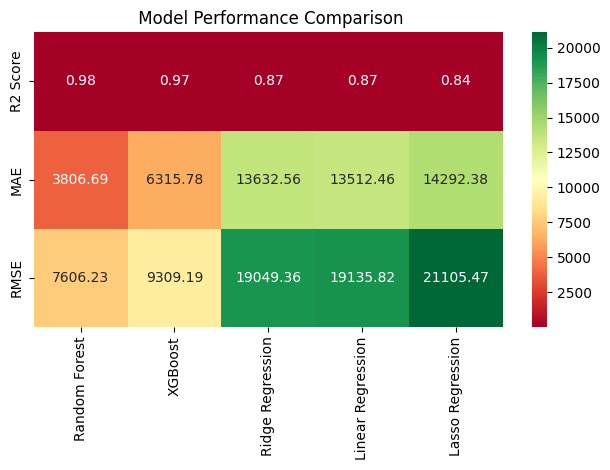

In [29]:
sns.heatmap(score_df.T, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title(" Model Performance Comparison")
plt.tight_layout()
plt.show()


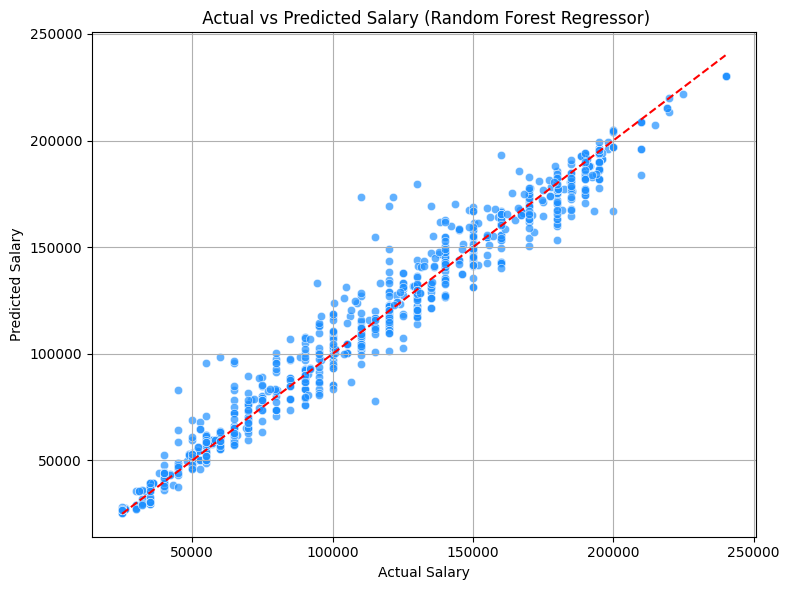

In [30]:
y_pred = model.predict(X_test)
plot_actual_vs_pred(y_test, y_pred, "Random Forest Regressor")


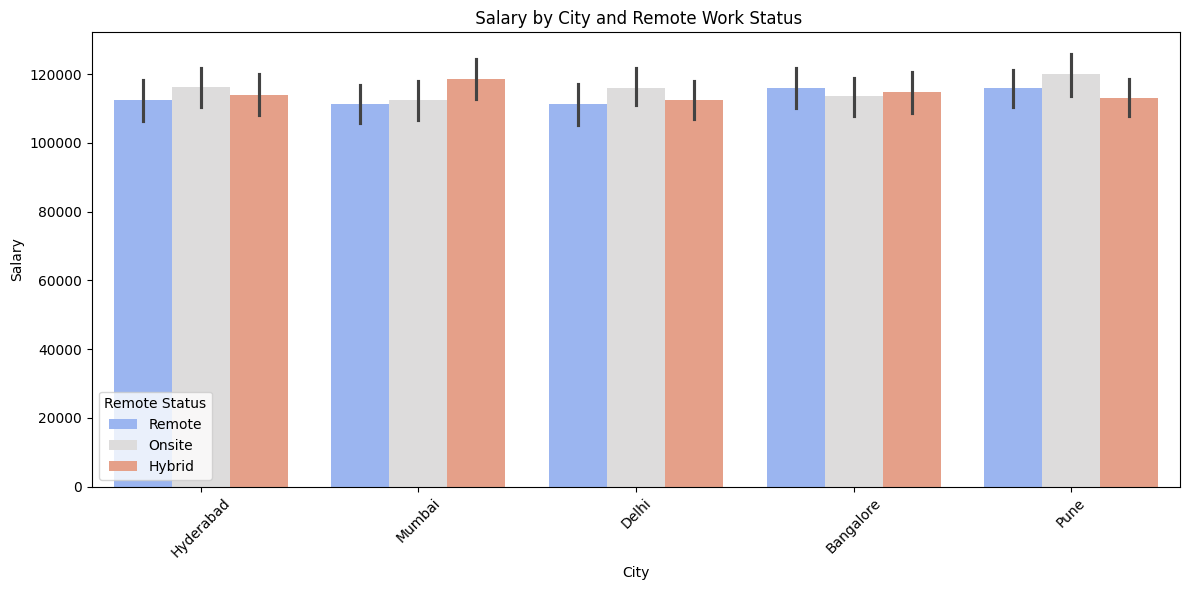

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='City', y='Salary', hue='Remote Status', palette='coolwarm')
plt.title(' Salary by City and Remote Work Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


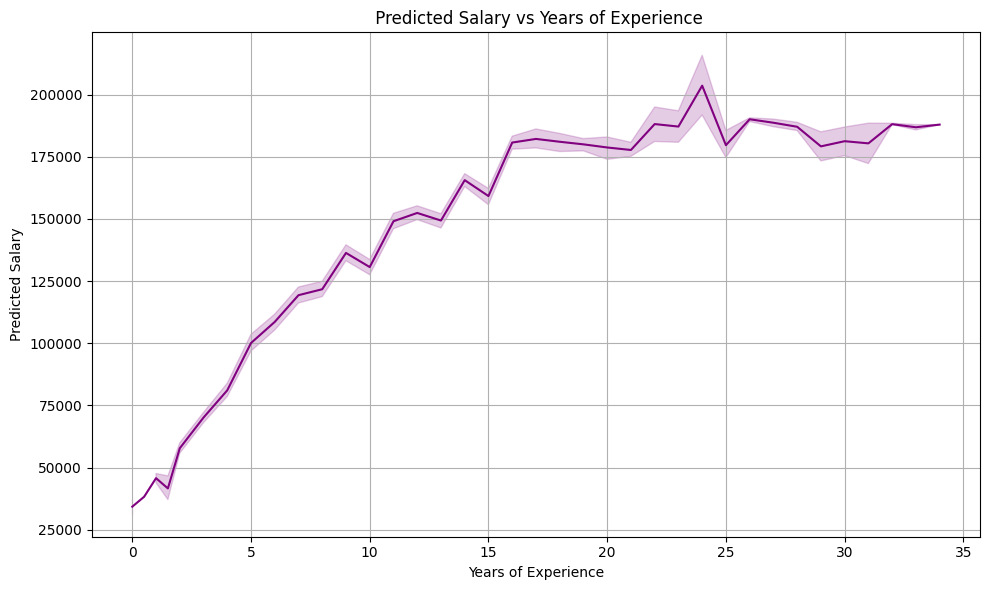

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Years of Experience'], y=model.predict(preprocessor.transform(df.drop('Salary', axis=1))), color='purple')
plt.title(' Predicted Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
!pip install streamlit

In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load model & preprocessor
model = pickle.load(open("model.pkl", "rb"))
preprocessor = pickle.load(open("preprocessor.pkl", "rb"))

st.set_page_config(page_title=" Employee Salary Predictor", layout="wide")

st.title(" Employee Salary Prediction App")
st.markdown("Use this app to predict salary based on employee information.")

# Sidebar form input
st.sidebar.header(" Enter Employee Details")

def user_input_features():
    age = st.sidebar.slider('Age', 18, 65, 30)
    gender = st.sidebar.selectbox('Gender', ['Male', 'Female', 'Other'])
    experience = st.sidebar.slider('Years of Experience', 0, 40, 5)
    education = st.sidebar.selectbox('Education Level', ['High School', 'Bachelor', 'Master', 'PhD'])
    job = st.sidebar.selectbox('Job Title', ['Data Analyst', 'Data Scientist', 'ML Engineer', 'Software Engineer'])
    city = st.sidebar.selectbox('City', ['Hyderabad', 'Bangalore', 'Mumbai', 'Delhi', 'Chennai'])
    seniority = st.sidebar.selectbox('Seniority Level', ['Junior', 'Mid', 'Senior', 'Lead'])
    industry = st.sidebar.selectbox('Industry', ['Tech', 'Finance', 'Healthcare', 'Retail', 'Education'])
    remote = st.sidebar.selectbox('Remote Status', ['Remote', 'In-Office', 'Hybrid'])

    data = {
        'Age': age,
        'Gender': gender,
        'Years of Experience': experience,
        'Education Level': education,
        'Job Title': job,
        'City': city,
        'Seniority Level': seniority,
        'Industry': industry,
        'Remote Status': remote
    }
    return pd.DataFrame([data])


input_df = user_input_features()

# Show input
st.subheader(' Input Data')
st.write(input_df)

# Preprocess input
X = preprocessor.transform(input_df)

# Predict
prediction = model.predict(X)[0]

# Output
st.subheader(" Predicted Salary:")
st.success(f"₹ {prediction:,.2f}")

# Add footer
st.markdown("---")
st.markdown(" Built by Navitha | IBM SkillBuild Internship Project")



Overwriting app.py


In [35]:
!pip install streamlit pyngrok

In [36]:
!ngrok authtoken 305FgYTOwjvQT2tOtOrBfNY5J9P_7fNt8jkNDsG8Sw9neetuY

Authtoken saved to configuration file: C:\Users\navit\AppData\Local/ngrok/ngrok.yml


In [37]:
import os
import threading

def run_streamlit():
    os.system('stremlit run app.py --server.port 8502')

thread=threading.Thread(target=run_streamlit)
thread.start()

In [40]:
from pyngrok import ngrok
import time

time.sleep(5)

public_url=ngrok.connect(8502)
print("Your Stremlit App is live here:", public_url)

Your Stremlit App is live here: NgrokTunnel: "https://ef888ef368a9.ngrok-free.app" -> "http://localhost:8502"
